# Binary Star System

m<sub>1</sub>r<sub>1</sub> = m<sub>2</sub>r<sub>2</sub><br>
r<sub>2</sub> = m<sub>1</sub>r<sub>1</sub>/m<sub>2</sub> = 2\*10<sup>30</sup> \* 1.5\*10<sup>11</sup>/ 4*10<sup>30</sup> = 75000000000

<br>

v<sub>cm</sub> = $\frac{m_1V_1+m_2V_2}{m1+m2}$ = 0 <br>

m<sub>1</sub>V<sub>1</sub> + m<sub>2</sub>V<sub>2</sub> = 0 <br>

V<sub>2</sub> = $\frac{-m_1V_1}{m_2}$ = $\frac{-2*10^{30} kg * 3.3*10^4 m/s}{4*10^{30} kg}$ = -16500 m/s

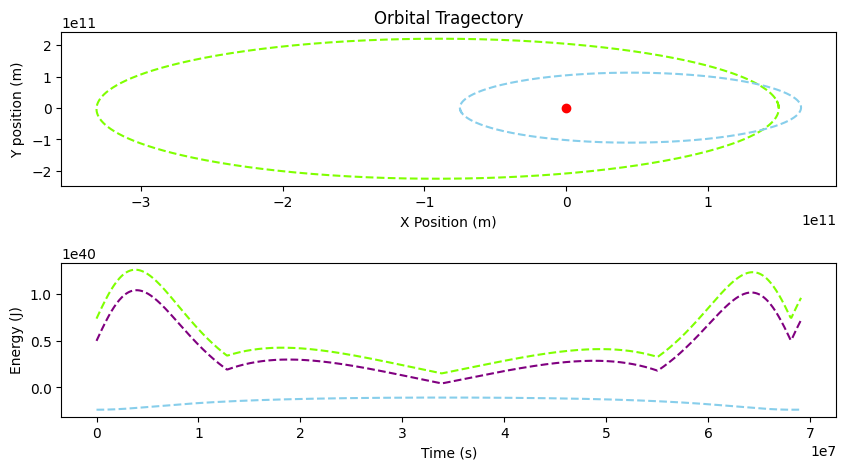

In [27]:
#libraries
import numpy as np
import matplotlib.pyplot as plt


m_1 = 2e+30 # kg
m_2 = 2*m_1 # kg
r_1 = np.array([1.5e+11,0]) # m 
r_2 = np.array([-7.5e+10, 0]) # m
v_1 = np.array([0,3.3e+4]) # m/s
v_2 = np.array([0,-16500]) # m/s

G = 6.6738e-11 # m^3/(kg*s^2) unversal gravitation constant
t = 0 # s, iterator
dt = 86400 # s, number of seconds in an Earth day

# Kinematic data
x_1_pos_list = [r_1[0]] # m
y_1_pos_list = [r_1[1]] # m
x_2_pos_list = [r_2[0]] # m
y_2_pos_list = [r_2[1]] # m
t_list = [t]

# Energy data
kinetic_list = [0.5 * (m_1 + m_2) * (abs(v_1[0]) + abs(v_1[1]) + abs(v_2[0]) + abs(v_2[1]))**2] # J 
gravitiational_potential_list = [-G*m_1*m_2/(np.linalg.norm(r_2-r_1))]
total_energy_list = [kinetic_list[0] + gravitiational_potential_list[0]]

def gravitational_force (m1, m2, pos1, pos2): # function to calculate gravitational force on object 1 caused by object 2. m = mass, pos = position
    r_21 = pos2 - pos1 # radius vector from object 1 to object 2
    rmag = np.linalg.norm(r_21) # normalizes the radius vector
    rhat = r_21 / rmag # radius unit vector

    return (G*m1*m2/rmag**2) * -rhat # gravitational force on object 2 by object 1

while t < 800*dt:
    # update forces
    Fnet = gravitational_force(m_2, m_1, r_2, r_1)

    # update kinematics for star 1
    a_1 = Fnet / m_1  #solve the acceleration
    v_1 = v_1 + a_1*dt  #solve the velocity
    r_1 = r_1 + v_1*dt  #solve the position

    # update kinematics for star 2
    a_2 = -Fnet / m_2  #solve the acceleration
    v_2 = v_2 + a_2*dt  #solve the velocity
    r_2 = r_2 + v_2*dt  #solve the position

    t = t + dt  #iterate the time

    x_1_pos_list.append(r_1[0]) 
    y_1_pos_list.append(r_1[1])
    x_2_pos_list.append(r_2[0])
    y_2_pos_list.append(r_2[1])

    t_list.append(t)
    
    kinetic_list.append(0.5 * (m_1 + m_2) * (abs(v_1[0]) + abs(v_1[1]) + abs(v_2[0]) + abs(v_2[1]))**2) # J 
    gravitiational_potential_list.append(-G*m_1*m_2/(np.linalg.norm(r_2-r_1)))
    total_energy_list.append(kinetic_list[len(kinetic_list) - 1] + gravitiational_potential_list[len(gravitiational_potential_list) - 1])




fig, ax = plt.subplots(2, figsize=(10,5)) # creates a plot with 2 subplots in a 2x1 array
fig.subplots_adjust(hspace=0.5) #adjusts the space between the plots

ax[0].set(xlabel="X Position (m)", ylabel="Y position (m)", title="Orbital Tragectory") # sets axis labels and title
ax[0].plot(x_1_pos_list, y_1_pos_list, color= 'chartreuse', label='one', linestyle="--") #adds the greenish color line to the plot
ax[0].plot(x_2_pos_list, y_2_pos_list, color= 'skyblue', label='two', linestyle="--") #adds the blue line to the plot
ax[0].scatter(0, 0, color= 'red') #adds the center of mass to the plot

ax[1].set(xlabel="Time (s)", ylabel="Energy (J)", title="") # sets axis labels and title
ax[1].plot(t_list, kinetic_list, color= 'chartreuse', label='one', linestyle="--") #adds the greenish color line to the plot
ax[1].plot(t_list, gravitiational_potential_list, color= 'skyblue', label='two', linestyle="--") #adds the blue line to the plot
ax[1].plot(t_list, total_energy_list, color= 'purple', label='one', linestyle="--") #adds the greenish color line to the plot
